In [1]:
from skimage.io import imread,imshow
from skimage.filters import threshold_mean
from skimage.util import img_as_float
from skimage.morphology import binary_erosion, disk,label
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import k_means

## Question 1

In [2]:
f_coins=imread('data/exam_images/coins.png')

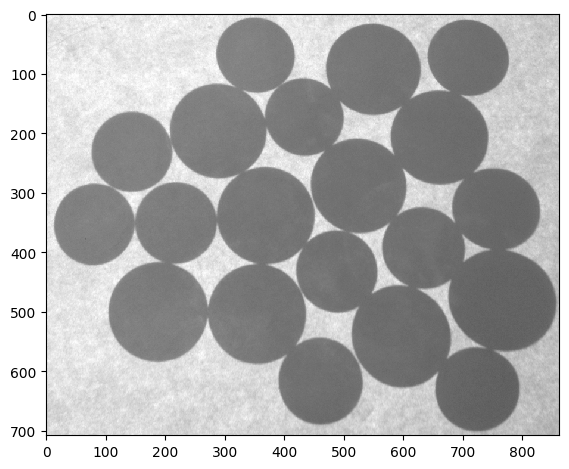

In [3]:
imshow(f_coins)

Create mask to seperate objects of interest from background

In [4]:
coin_thres = threshold_mean(f_coins)
print(coin_thres)

159.69155521076786


In [5]:
coins_mask = f_coins < coin_thres

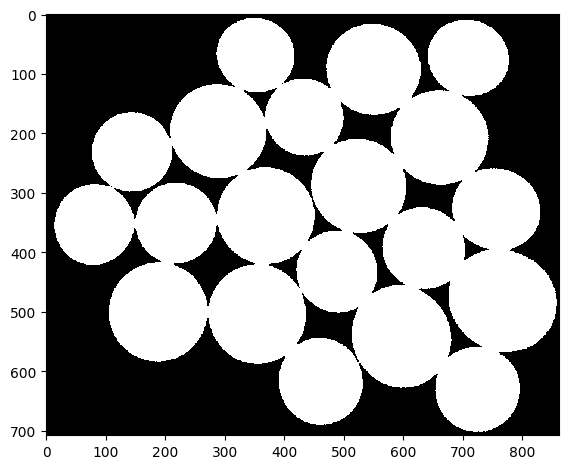

In [6]:
imshow(img_as_float(coins_mask))

Erode coins to create seperated components

In [7]:
coin_se = disk(25)

In [8]:
coins_mask_sep = binary_erosion(coins_mask,coin_se)

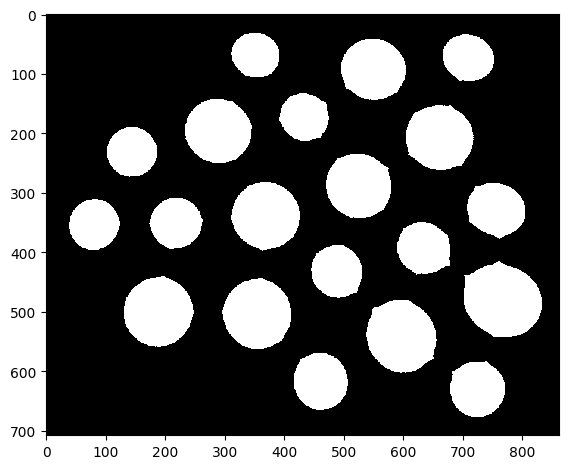

In [9]:
imshow(img_as_float(coins_mask_sep))

Extract connected components

In [10]:
coin_label = label(coins_mask_sep)

/home/marcelln/Digital-Image-Processing/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


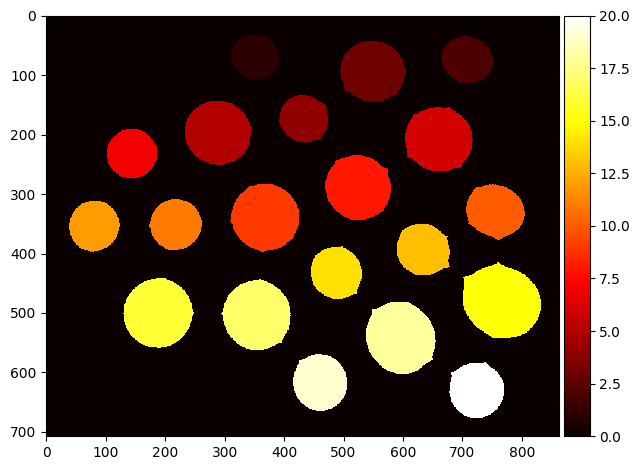

In [11]:
imshow(coin_label,cmap='hot')

Count unique connected componets to determine total

In [12]:
n_components = np.unique(coin_label)
print("Total amount of coins is: "+str(n_components[-1]))

Total amount of coins is: 20


Display all results

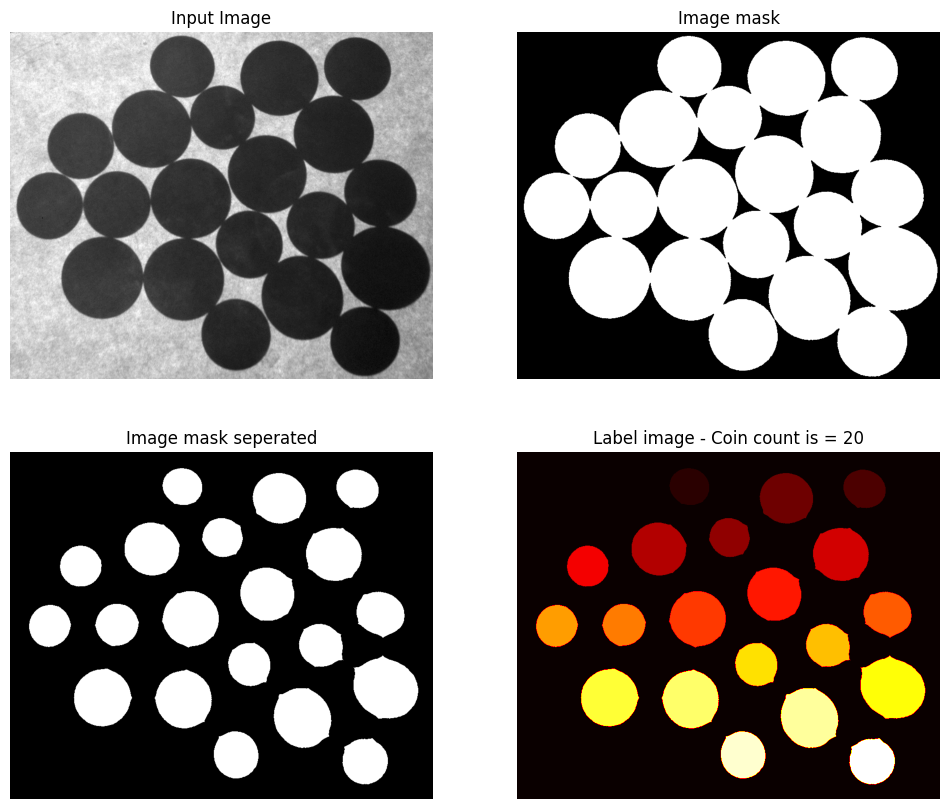

In [13]:
plt.subplots(2,2,figsize=(12,10))
plt.subplot(2,2,1), plt.imshow(f_coins,cmap='gray'), plt.axis('off'), plt.title('Input Image')
plt.subplot(2,2,2), plt.imshow(img_as_float(coins_mask),cmap='gray'), plt.axis('off'), plt.title('Image mask')
plt.subplot(2,2,3), plt.imshow(img_as_float(coins_mask_sep),cmap='gray'), plt.axis('off'), plt.title('Image mask seperated')
plt.subplot(2,2,4), plt.imshow(coin_label,cmap='hot'), plt.axis('off'), plt.title('Label image - Coin count is = ' + str(n_components[-1]))
plt.show()

## Question 2

In [14]:
f_ice=imread('data/exam_images/iceberg.tif')

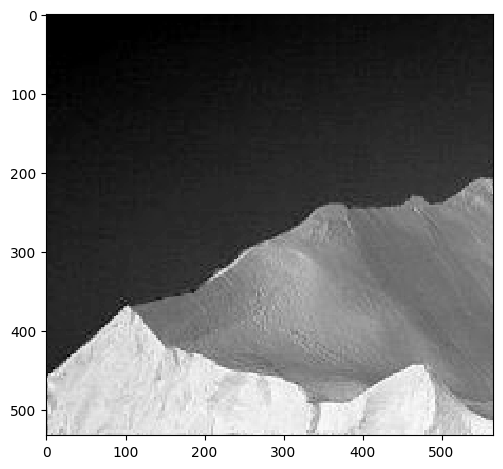

In [15]:
imshow(f_ice)

K means alone

In [16]:
res1 = k_means(np.ravel(f_ice).reshape(-1, 1),n_clusters=3)

In [17]:
bins1=[]
centroids1 = np.sort(res1[0], axis=0)
for i in range(centroids1.shape[0]-1):
    bins1.append(int((centroids1[i]+centroids1[i+1])/2))

/tmp/ipykernel_5628/3881957235.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bins1.append(int((centroids1[i]+centroids1[i+1])/2))


In [18]:
f_ice_kmeans = np.digitize(f_ice,bins1)

/home/marcelln/Digital-Image-Processing/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


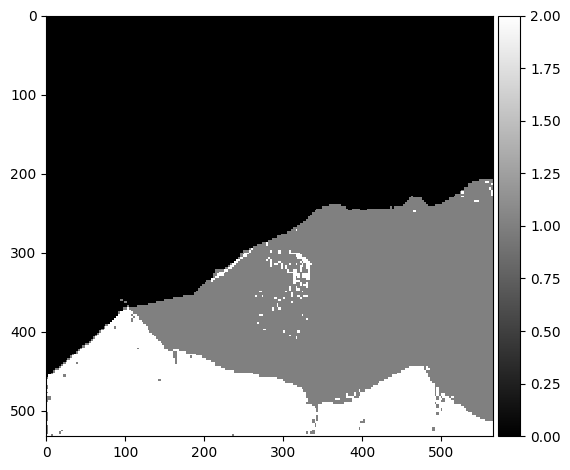

In [19]:
imshow(f_ice_kmeans,cmap='gray')

Results in some misclassification as components not connected

Now by first creating super pixels

In [20]:
f_ice_3 = np.stack((f_ice,f_ice,f_ice),axis=-1)    # Slic function seems to give better results using 3 channels

In [21]:
f_ice_super_lab = slic(f_ice_3,start_label=1,n_segments=100,channel_axis=-1)

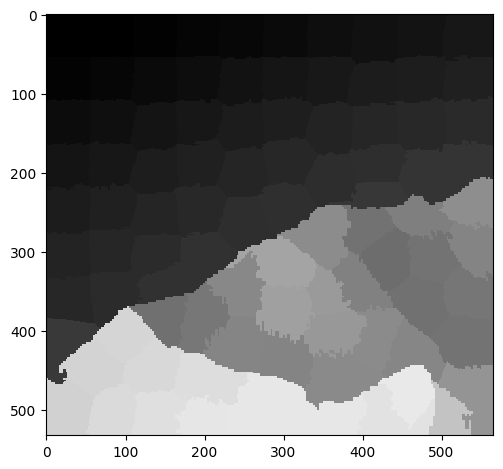

In [22]:
f_ice_super = label2rgb(f_ice_super_lab,f_ice_3,kind='avg')
imshow(f_ice_super,cmap='gray')

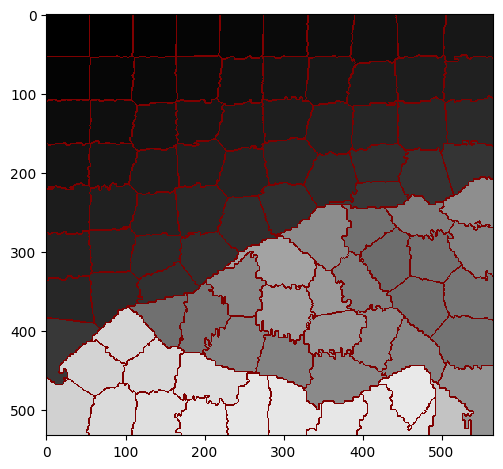

In [23]:
f_ice_super_bound = mark_boundaries(f_ice_super,f_ice_super_lab,color=(0.5,0,0))
imshow(f_ice_super_bound)

Now add k means

In [24]:
res2 = k_means(np.ravel(f_ice_super).reshape(-1, 1), n_clusters=3)

In [25]:
bins2=[]
centroids2 = np.sort(res2[0], axis=0)
for i in range(centroids2.shape[0]-1):
    bins2.append(int((centroids2[i]+centroids2[i+1])/2))

/tmp/ipykernel_5628/2558414826.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bins2.append(int((centroids2[i]+centroids2[i+1])/2))


In [26]:
f_ice_super_kmeans = np.digitize(f_ice_super,bins2)*255//2

/home/marcelln/Digital-Image-Processing/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


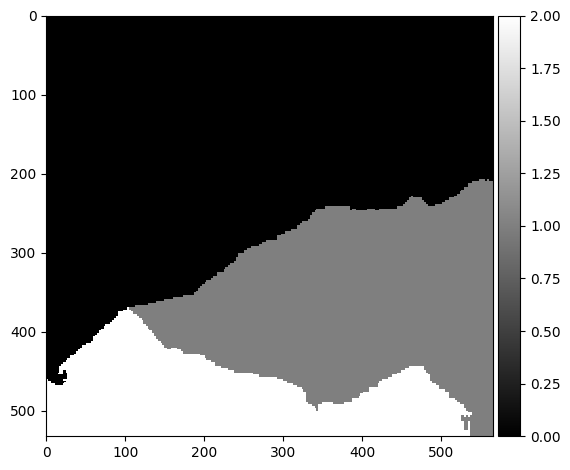

In [27]:
imshow(f_ice_super_kmeans, cmap='gray', vmin=0, vmax=2)

New results are now fully connected

Plot results

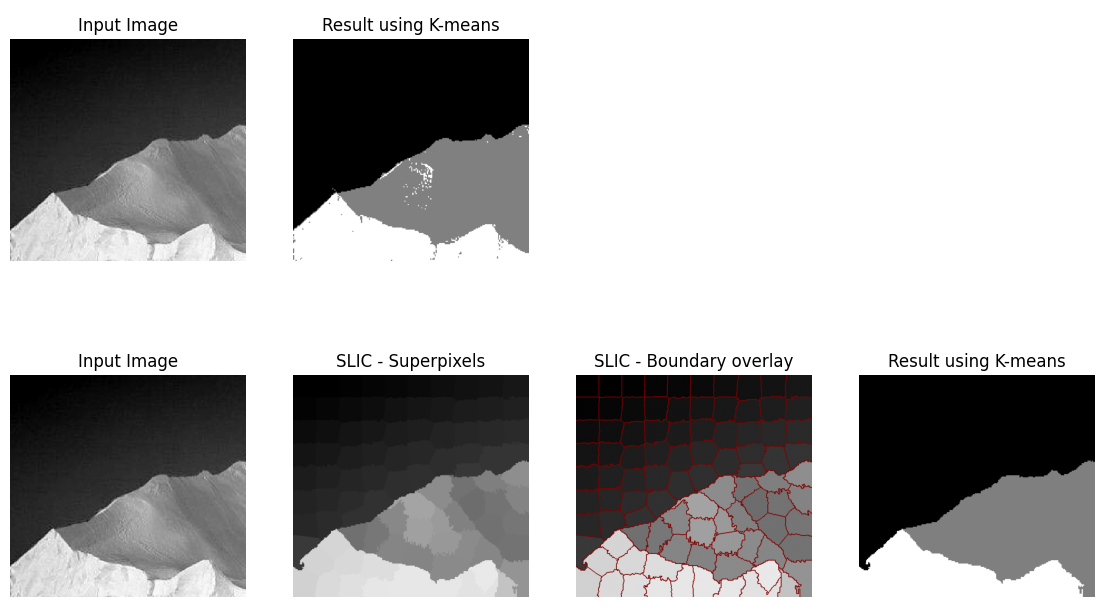

In [28]:
plt.subplots(2,4,figsize=(14,8), sharex=True,sharey=True)
plt.subplot(2,4,1), plt.imshow(f_ice,cmap='gray'), plt.axis('off'), plt.title('Input Image')
plt.subplot(2,4,2), plt.imshow(f_ice_kmeans,cmap='gray'), plt.axis('off'), plt.title('Result using K-means')
plt.subplot(2,4,3), plt.axis('off'),
plt.subplot(2,4,4), plt.axis('off'), 
plt.subplot(2,4,5), plt.imshow(f_ice,cmap='gray'), plt.axis('off'), plt.title('Input Image')
plt.subplot(2,4,6), plt.imshow(f_ice_super,cmap='gray'), plt.axis('off'), plt.title('SLIC - Superpixels')
plt.subplot(2,4,7), plt.imshow(f_ice_super_bound,cmap='gray'), plt.axis('off'), plt.title('SLIC - Boundary overlay')
plt.subplot(2,4,8), plt.imshow(f_ice_super_kmeans,cmap='gray'), plt.axis('off'), plt.title('Result using K-means')
plt.show()